<a href="https://colab.research.google.com/github/WendyValdes/Recomandations/blob/main/recomendar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [1]:
import cv2
import os
import numpy as np

Access the drive folder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Settings

In [3]:
DATASET_DIR = "/content/drive/MyDrive/Colab Notebooks/seu_projeto/dataset"
TEST_IMAGE = "/content/drive/MyDrive/Colab Notebooks/seu_projeto/teste.jpg"
TOP_K = 5   # number of recommendations

Load query image

In [5]:
query_img = cv2.imread(TEST_IMAGE)
if query_img is None:
    raise Exception("Erro: teste.jpg não encontrada!")

query_gray = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)

Create ORB extractor

In [6]:
orb = cv2.ORB_create(nfeatures=2000)

# Extract key points and descriptors from the query image.
kp_query, des_query = orb.detectAndCompute(query_gray, None)

Prepare descriptor comparator

In [7]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

Process images from the dataset.

In [8]:
similaridades = []
imagens_dataset = []

for nome_arq in os.listdir(DATASET_DIR):
    caminho = os.path.join(DATASET_DIR, nome_arq)

    img = cv2.imread(caminho)
    if img is None:
        continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    kp, des = orb.detectAndCompute(gray, None)

    #If there are no descriptors, skip.
    if des is None or des_query is None:
        continue

    # Compare descriptors
    matches = bf.match(des_query, des)

    # Sort by best match
    matches = sorted(matches, key=lambda x: x.distance)

    # Similarity = average distance of the best matches
    if len(matches) > 0:
        media_dist = np.mean([m.distance for m in matches[:50]])
    else:
        media_dist = float("inf")

    similaridades.append(media_dist)
    imagens_dataset.append(img)

Select the most similar TOP-K

In [9]:
idx_ordenados = np.argsort(similaridades)[:TOP_K]

recomendadas = [imagens_dataset[i] for i in idx_ordenados]

SCREEN DISPLAY

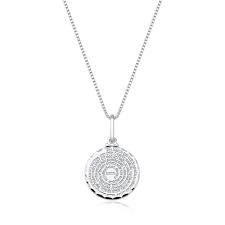

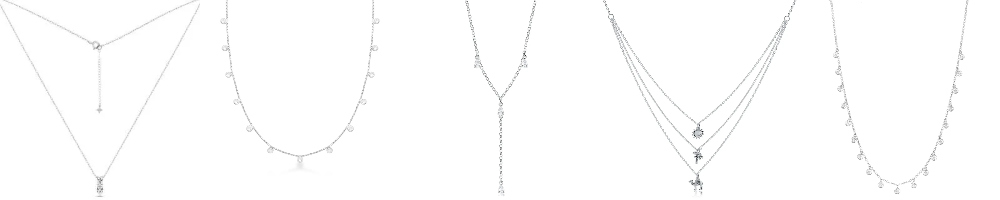

In [10]:
from google.colab.patches import cv2_imshow
import numpy as np

# Show query image
cv2_imshow(query_img)

# Show recommendations side by side
linha = None

for i, img_rec in enumerate(recomendadas):
    # Resize the image for display (can be adjusted)
    img_rec_resized = cv2.resize(img_rec, (200, 200))

    if linha is None:
        linha = img_rec_resized
    else:
        linha = np.hstack((linha, img_rec_resized))

cv2_imshow(linha)

# cv2.waitKey(0) and cv2.destroyAllWindows() are not needed with cv2_imshow in Colab.